In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Autoinsurance_fraud.csv')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
data.drop(['_c39'],axis=1,inplace=True)

In [7]:
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
data['collision_type'].fillna(data['collision_type'].value_counts().index[0], inplace = True)
data['property_damage'].fillna(data['property_damage'].value_counts().index[0], inplace = True)
data['police_report_available'].fillna(data['police_report_available'].value_counts().index[0], inplace = True)

In [9]:

data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [10]:

data.age.max()

64

In [11]:
data['age_bins'] = pd.cut(data.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

In [12]:
age_vs_fraud = pd.crosstab(data['age_bins'], data['fraud_reported'])

In [13]:
age_vs_fraud

fraud_reported,N,Y
age_bins,,
11-20,1,1
21-30,150,45
31-40,302,94
41-50,221,72
51-60,66,30
61-70,13,5


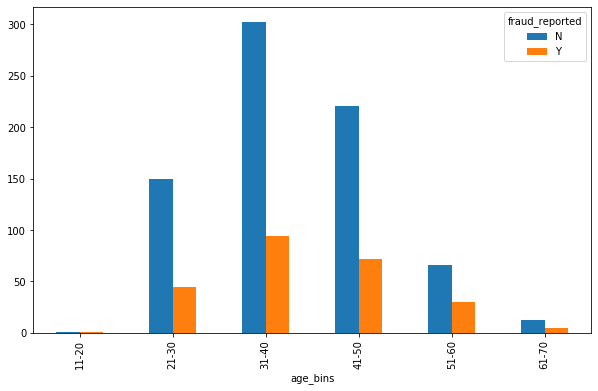

In [14]:
age_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [15]:
incisev_vs_fraud = pd.crosstab(data['incident_severity'], data['fraud_reported'])

In [16]:
incisev_vs_fraud

fraud_reported,N,Y
incident_severity,,
Major Damage,109,167
Minor Damage,316,38
Total Loss,244,36
Trivial Damage,84,6


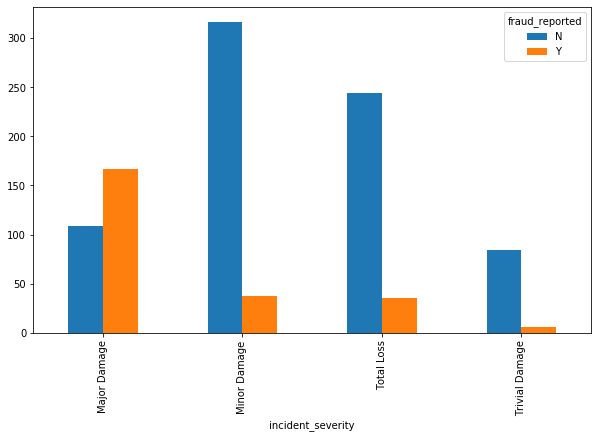

In [17]:
incisev_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [18]:
print(data.total_claim_amount.min())
print(data.total_claim_amount.max())

100
114920


In [19]:
data['total_claim_bins'] = pd.cut(data.total_claim_amount, bins = [0, 11500, 33000, 44800, 56300, 67800, 79300, 90800, 102300, 113800, 125300], include_lowest = True, labels = ['0-11500','11501-33000','33001-44800','444801-56300', '56301-67800', '67801-79300', '79301-90800','90801-102300','102301-113800','113801-125300'])

In [20]:
total_claim_vs_fraud = pd.crosstab(data.total_claim_bins, data.fraud_reported)

In [21]:
total_claim_vs_fraud

fraud_reported,N,Y
total_claim_bins,,
0-11500,162,16
11501-33000,19,3
33001-44800,63,19
444801-56300,127,58
56301-67800,174,58
67801-79300,118,57
79301-90800,64,24
90801-102300,20,9
102301-113800,5,3


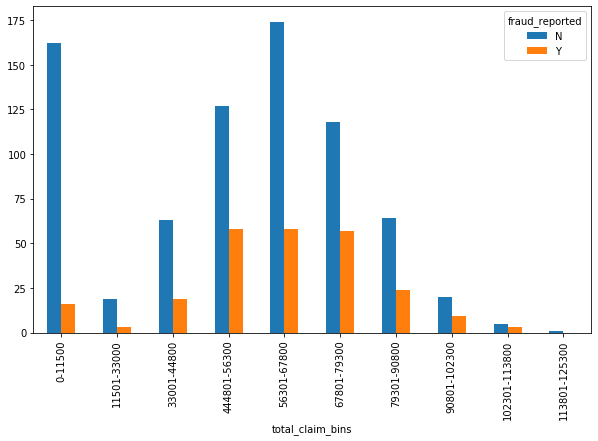

In [22]:

total_claim_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [23]:
gender_wise_fraud = pd.crosstab(data.insured_sex, data.fraud_reported)
gender_wise_fraud

fraud_reported,N,Y
insured_sex,,
FEMALE,411,126
MALE,342,121


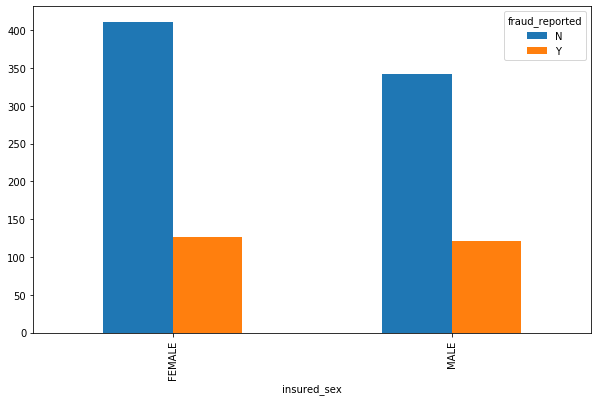

In [24]:
gender_wise_fraud.plot(kind = 'bar', figsize = (10,6))

In [25]:
print(data.policy_annual_premium.min())
print(data.policy_annual_premium.max())

433.33
2047.59


In [26]:
data['policy_premium_bins'] = pd.cut(data.policy_annual_premium, bins = [0, 500, 1000, 1500, 2000], include_lowest = True, labels = ['0-500','501-1000','1001-1500','1501-2000'])

In [27]:
policy_premium_vs_fraud = pd.crosstab(data.policy_premium_bins, data.fraud_reported)
policy_premium_vs_fraud

fraud_reported,N,Y
policy_premium_bins,,
0-500,1,1
501-1000,107,44
1001-1500,529,164
1501-2000,115,38


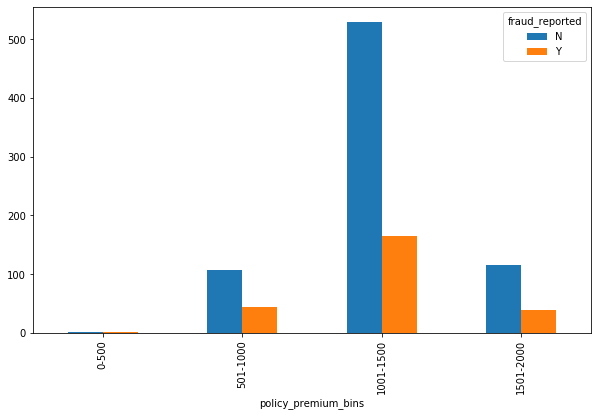

In [28]:
policy_premium_vs_fraud.plot(kind = 'bar', figsize = (10,6))

In [29]:
data[['policy_state', 'insured_education_level', 'insured_occupation','incident_type', 'collision_type', 'incident_severity', 'authorities_contacted']].describe()

,policy_state,insured_education_level,insured_occupation,incident_type,collision_type,incident_severity,authorities_contacted
count,1000,1000,1000,1000,1000,1000,1000
unique,3,7,14,4,4,4,5
top,OH,JD,machine-op-inspct,Multi-vehicle Collision,Rear Collision,Minor Damage,Police
freq,352,161,93,419,292,354,292


In [30]:
data.drop(columns = ['policy_bind_date','policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim','age_bins', 'total_claim_bins', 'policy_premium_bins'], axis = 1, inplace = True)

In [31]:
data.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,...,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,OH,1000,1406.91,0,MALE,53300,0,...,5,1,1,2,YES,71610,Saab,92x,2004,Y
1,228,42,342868,IN,2000,1197.22,5000000,MALE,0,0,...,8,1,0,0,?,5070,Mercedes,E400,2007,Y
2,134,29,687698,OH,2000,1413.14,5000000,FEMALE,35100,0,...,7,3,2,3,NO,34650,Dodge,RAM,2007,N
3,256,41,227811,IL,2000,1415.74,6000000,FEMALE,48900,-62400,...,5,1,1,2,NO,63400,Chevrolet,Tahoe,2014,Y
4,228,44,367455,IL,1000,1583.91,6000000,MALE,66000,-46000,...,20,1,0,1,NO,6500,Accura,RSX,2009,N


In [32]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
collision_type                  object
incident_severity               object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_make                       object
auto_model                      object
auto_year                        int64
fraud_reported                  object
dtype: object

In [33]:
data['fraud_reported'] = data['fraud_reported'].replace({'Y': 1, 'N': 0})

In [34]:
data['fraud_reported'].head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [35]:
x = data.drop('fraud_reported', axis= 1)
x.head()

,months_as_customer,age,policy_number,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,capital-gains,capital-loss,...,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,auto_make,auto_model,auto_year
0,328,48,521585,OH,1000,1406.91,0,MALE,53300,0,...,9935 4th Drive,5,1,1,2,YES,71610,Saab,92x,2004
1,228,42,342868,IN,2000,1197.22,5000000,MALE,0,0,...,6608 MLK Hwy,8,1,0,0,?,5070,Mercedes,E400,2007
2,134,29,687698,OH,2000,1413.14,5000000,FEMALE,35100,0,...,7121 Francis Lane,7,3,2,3,NO,34650,Dodge,RAM,2007
3,256,41,227811,IL,2000,1415.74,6000000,FEMALE,48900,-62400,...,6956 Maple Drive,5,1,1,2,NO,63400,Chevrolet,Tahoe,2014
4,228,44,367455,IL,1000,1583.91,6000000,MALE,66000,-46000,...,3041 3rd Ave,20,1,0,1,NO,6500,Accura,RSX,2009


In [36]:
y = data['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x = pd.DataFrame(x)

In [38]:
from sklearn.preprocessing import OrdinalEncoder
# Encoding
enc = OrdinalEncoder()
x= enc.fit_transform(x)

In [39]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'capital-gains', 'capital-loss', 'collision_type',
       'incident_severity', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [40]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
collision_type                  object
incident_severity               object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount               int64
auto_make                       object
auto_model                      object
auto_year                        int64
fraud_reported                   int64
dtype: object

In [41]:
from sklearn.preprocessing import LabelEncoder
column=['policy_state',
       'insured_sex', 'collision_type',
       'incident_severity', 'incident_location', 
       'police_report_available', 'auto_make',
       'auto_model']
le=LabelEncoder()
for i in column:
        data[i] = le.fit_transform(data[i].astype(str))

print(data.dtypes)

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                     int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
capital-gains                    int64
capital-loss                     int64
collision_type                   int32
incident_severity                int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount               int64
auto_make                        int32
auto_model                       int32
auto_year                        int64
fraud_reported                   int64
dtype: object


In [42]:
#Algorithms
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=4 )

In [44]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (700, 22) (700,)
Test set: (300, 22) (300,)


In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [82]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [83]:
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('GaussianNB',GNB))


In [84]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsOneClassifier
from sklearn.datasets import make_classification

********************* KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score= 0.6966666666666667


Cross_Val_Score = 0.726


roc_auc_score- 0.48494841873837313


classification_report
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       219
           1       0.14      0.02      0.04        81

    accuracy                           0.70       300
   macro avg       0.43      0.48      0.43       300
weighted avg       0.57      0.70      0.61       300



[[207  12]
 [ 79   2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



********************* SVC ***********************


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, p

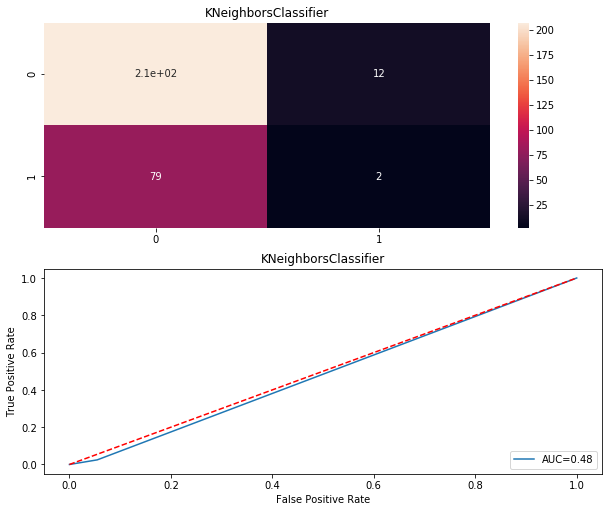

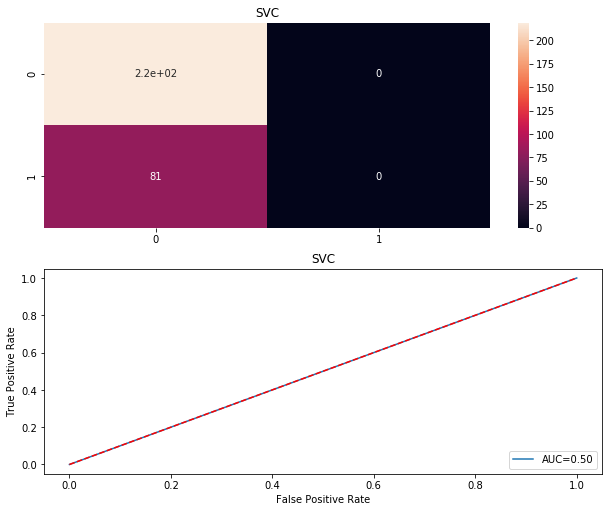

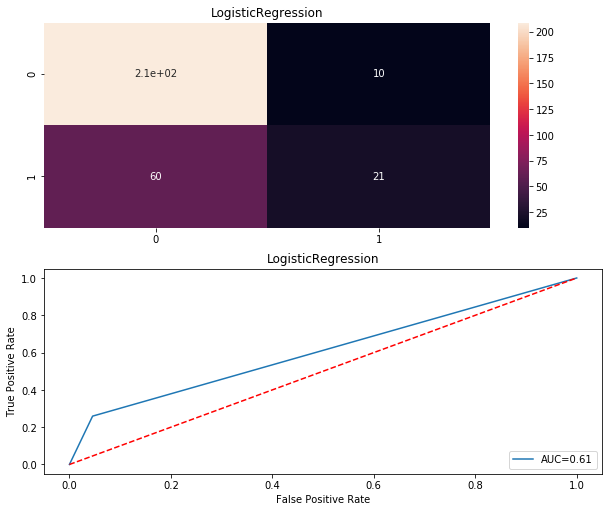

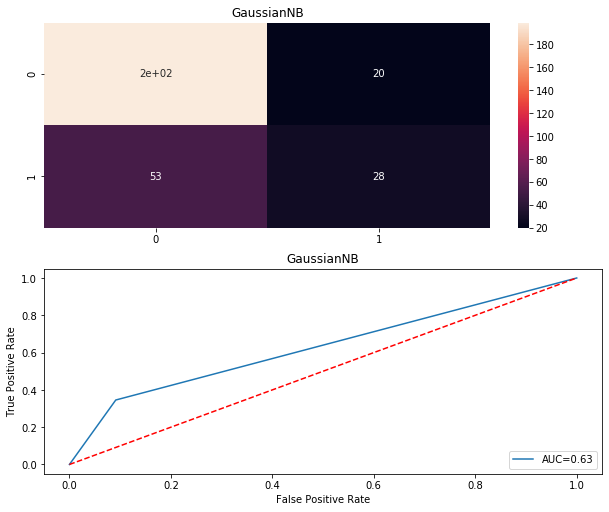

In [85]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('*********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score=' ,AS)
    score.append(AS*100)
    print('\n')
    sc= cross_val_score(model,x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score =',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds = roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score-',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [86]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score, 'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,69.666667,72.6,48.494842
1,SVC,73.000000,75.3,50.000000
2,LogisticRegression,76.666667,75.4,60.679858
3,GaussianNB,75.666667,76.3,62.717741


I choose Logistic Regression as my final model

In [87]:
from sklearn.externals import joblib
#save the model 
joblib.dump(LR, 'Project11B.obj')

['Project11B.obj']